In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
# import joblib 

plt.style.use("fivethirtyeight")

In [28]:
# create the basic single layer deep learning model 
# w <- w + eta * (y - y_hat)       -------> weigth updation


class Perceptron :
    def __init__(self , eta , epoch , activationFunction):
        self.eta = eta 
        self.epoch = epoch 
        self.activationFunction = activationFunction
        self.weights = np.random.randn(3) * 1e-4
        print(f"self.weights : \n{self.weights}")
        
    def fit(self , X , y):
        self.X = X 
        self.y =  y
        
        X_with_biased = np.c_[self.X , -np.ones(( len(self.X) , 1 ))]  # concatination 
        print(f"X_with_bias: \n{X_with_biased}")
        
        for epoch in range(self.epoch):
            print(f'epoch no :==> {epoch}')
            y_hat  = self.activationFunction( X_with_biased , self.weights )
            print(f"predicted value: \n{y_hat}")
            error = self.y - y_hat
            print(f"error: \n{error}")
            # we got the error , let's update the weights
            # w <- w + eta * (y - y_hat)
            self.weights = self.weights + self.eta * np.dot(X_with_biased.T, error)
            print(f"updated weights: \n{self.weights}")
            print('##########' * 4 ,'\n')
            
    def predict(self , X ):
        X_with_biased = np.c_[self.X , -np.ones(( len(self.X) , 1 ))]  # concatination 
        return activationFunction( X_with_biased , self.weights )
            

In [8]:
activationFunction = lambda inputs , weights : np.where(np.dot(inputs , weights) > 0, 1 , 0 )
# where the np.dot(inputs , weights) > 0 convert it as 1 else 0 
# this the step function     

```python 
# ways to write same function 
 
def activationFunction(inputs , weights):
    mul = np.dot( inputs , weights )
    y_hat  = np.where( mul > 0 , 1 , 0 )
    return y_hat 
 
 
def activationFunction(inputs , weights):
    mul = np.dot( inputs , weights )
    if mul > 0 :
        y_hat = 1 
    else:
        y_hat = 0 
    return y_hat 
 
def activationFunction(inputs , weights):
    mul = np.dot( inputs , weights )
    return 1 if mul > 0 else 0
```

# AND 

In [10]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,0,0,1]}
AND = pd.DataFrame(data)
AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [11]:
X = AND.drop('y' , axis=  1 )
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [12]:
y = AND.y
y.to_frame()

,y
0,0
1,0
2,0
3,1


In [30]:
model  = Perceptron( eta = 0.001 , epoch = 8 , activationFunction = activationFunction )
# eta >>> learning rate (0-1)
# epoch >>> how many times you have to update weights 
# activationFunction >>> function defined outside the class for prediction 
model.fit(X,y)
# once the error == 0 , upadating of the weight is stopped 

self.weights : 
[-5.86439872e-05  4.05320422e-05  5.89499535e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
epoch no :==> 0
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights: 
[ 0.00194136  0.00204053 -0.00294105]
######################################## 

epoch no :==> 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00194136  0.00204053 -0.00194105]
######################################## 

epoch no :==> 2
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00194136  0.00204053 -0.00094105]
######################################## 

epoch no :==> 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[1.94135601e-03 2.04053204e-03 5.89499535e-05]
######################################## 

epoch no :==> 4
predicted value: 
[0 1 1 1]
er

# OR 

In [31]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,1]}

OR = pd.DataFrame(data)
OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [32]:
X= OR.drop('y' ,axis = 1 )
y = OR.y 

In [33]:
model  = Perceptron( eta = 0.001 , epoch = 8 , activationFunction = activationFunction )
model.fit(X,y)

self.weights : 
[-0.00015529  0.00010766 -0.00014737]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
epoch no :==> 0
predicted value: 
[1 1 0 1]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00084471  0.00010766 -0.00014737]
######################################## 

epoch no :==> 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[0.00084471 0.00010766 0.00085263]
######################################## 

epoch no :==> 2
predicted value: 
[0 0 0 1]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00184471  0.00110766 -0.00114737]
######################################## 

epoch no :==> 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00184471  0.00110766 -0.00014737]
######################################## 

epoch no :==> 4
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2   

In [34]:
model.predict( X )

array([0, 1, 1, 1])

# XOR 

- here the we can't classify the (Non Linear Data) XOR with single perceptron
- because , **perceptron only capable for only linear data classification**
- and it's the disadvantage of the single layer perceptron model
- hence , to overcome this we use **multilayer nural network**

In [35]:
data = {"x1": [0,0,1,1], "x2": [0,1,0,1], "y": [0,1,1,0]}

XOR = pd.DataFrame(data)
XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [36]:
X= XOR.drop('y' , axis=1)
y = XOR.y

In [37]:
model  = Perceptron( eta = 0.001 , epoch = 8 , activationFunction = activationFunction )
model.fit(X,y)

self.weights : 
[-9.52268103e-05 -8.04109748e-05 -6.65758316e-05]
X_with_bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
epoch no :==> 0
predicted value: 
[1 0 0 0]
error: 
0   -1
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00090477  0.00091959 -0.00106658]
######################################## 

epoch no :==> 1
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-9.52268103e-05 -8.04109748e-05  9.33424168e-04]
######################################## 

epoch no :==> 2
predicted value: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights: 
[ 0.00090477  0.00091959 -0.00106658]
######################################## 

epoch no :==> 3
predicted value: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights: 
[-9.52268103e-05 -8.04109748e-05  9.33424168e-04]
######################################## 

epoch no :==> 4
predicted value

# **Graphical Analysis**

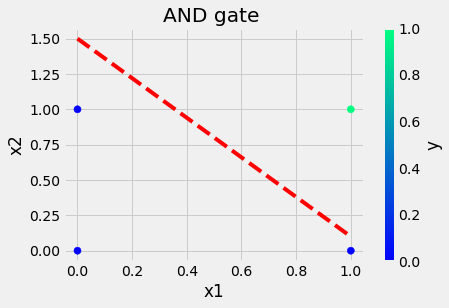

In [40]:
AND.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.title("AND gate ")
x = np.linspace(0, 1) # >>> 50 
y = 1.5 - 1*np.linspace(0, 1.4) # >>> 50 
plt.plot(x,y ,'r--')


Text(0.5, 1.0, 'OR gate ')

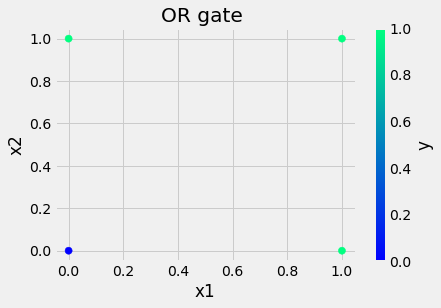

In [41]:
OR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.title("OR gate ")

Text(0.5, 1.0, 'XOR gate ')

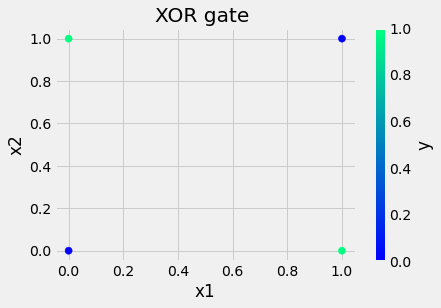

In [43]:
XOR.plot(kind="scatter", x="x1", y="x2", c="y", s=50, cmap="winter")
plt.title("XOR gate ")
#here the data can't be linearly seperate
# hence we use multilayer nural network
